**EL HARKAOUI Chaymae --- 06-03-2024**

# **Shopping Customer Segmentation and Clustering** 

**Unsuperviesed Machine Learning**

## **<font color='red'><u>Objectives</u></font>**

 - Understand the **target customers** for the marketing team to plan a strategy.
 - Identify the most important **shopping groups** based on income, age and mall shopping scores.
 - Find the **ideal number of groups** with a **label** for each.
 - Divide the mall target market into approachable groups.
 - Create subsets of the market based on demographics behavioral criteria for a better understanding of the marketing activities target.

## **<font color='red'><u>The Approach</u></font>**

1. Perform some quick EDA - Exploratory Data Analysis
2. Use KMEANS Clustering Algorithm to create our segments
3. Use Summary Statistics on the Clusters
4. Visualize


## **<font color='green'>Librairies Importing</font>**

In [2]:
import pandas as pd      # type: ignore
import seaborn as sns    # type: ignore
import matplotlib.pyplot as plt      # type: ignore
from sklearn.cluster import KMeans   # type: ignore
import warnings 
warnings.filterwarnings('ignore')

## **<font color='green'>Importing Customers Data</font>**

In [3]:
data = pd.read_csv('Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## **<font color='green'>Univariate Analysis</font>**

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

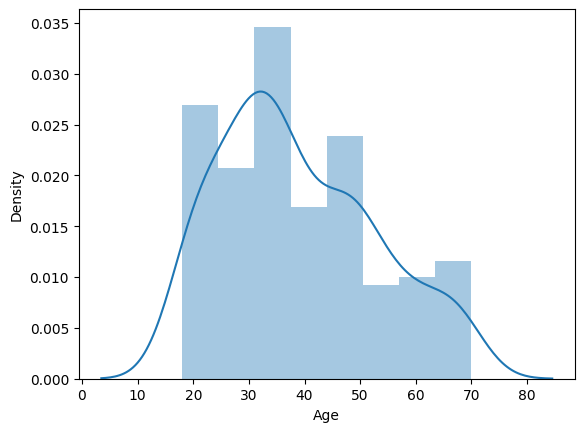

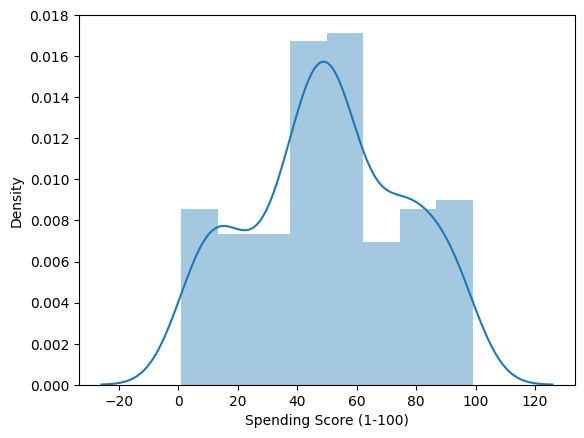

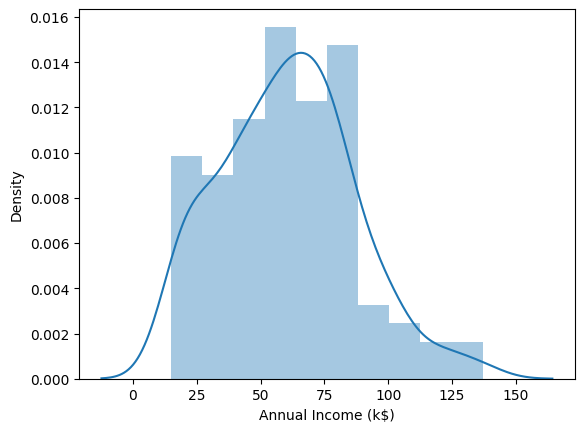

In [6]:
# visualise variables variations
columns = ['Age','Spending Score (1-100)','Annual Income (k$)']
for i in columns :
     plt.figure()
     sns.distplot(data[i])

**<u> Age Distribution </u>** 

The dataset is likely skewed towards individuals around the age of 30, as indicated by the peak density at this age range in the plot. This suggests that the population may have a higher representation of individuals in their thirties compared to other age groups.

**<u> Data Variability </u>** 

The variations in density across different age groups and the presence of peaks and troughs in the curve indicate potential variability in the dataset. This variability could suggest different patterns or subgroups within the data related to age.

**<u>Spending Score Distribution</u>**

The histogram and line graph illustrate the distribution of spending scores within the dataset. The peak around a score of 50 suggests that a significant number of data points fall within this range, indicating a common spending behavior or trend among the individuals in the dataset.

**<u>Annual Income Distribution</u>**

it appears that the most common annual income range is between 50 and 75 thousand dollars, as this range has the tallest bar. The density decreases for both lower and higher income ranges. There are very few individuals with an annual income above 125 thousand dollars, as indicated by the very short bars in that range.

The distribution of income seems to be right-skewed, meaning that there is a longer tail on the right side of the histogram. This indicates that while most individuals earn less than 100 thousand dollars annually, there is a smaller number of individuals with significantly higher incomes that stretch the distribution to the right.

this provides a visual representation of how annual income is distributed across a population, with most individuals earning moderate incomes and fewer individuals earning very low or very high incomes.

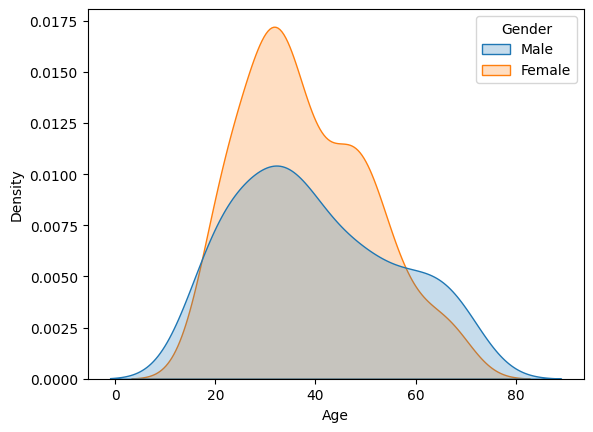

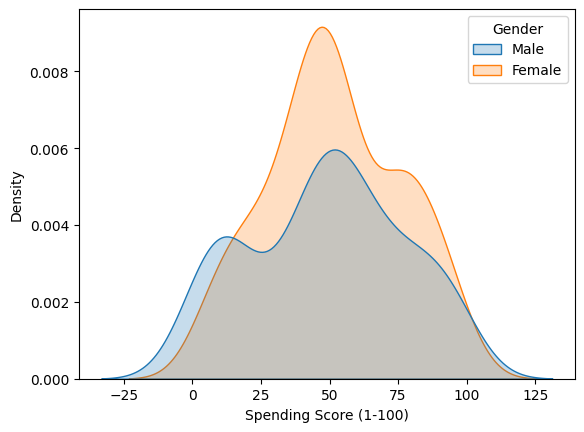

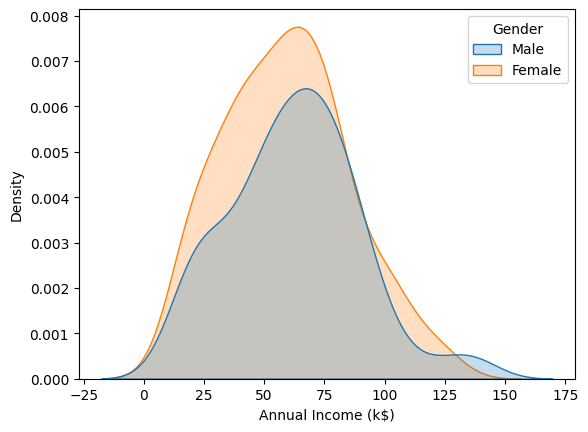

In [20]:
# visualise variables variations based on Gender
columns = ['Age','Spending Score (1-100)','Annual Income (k$)']
for i in columns :
     plt.figure()
     sns.kdeplot(data=data, x = i, shade=True, hue='Gender')

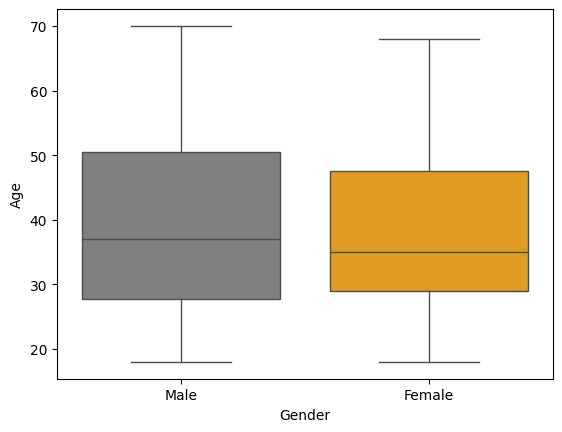

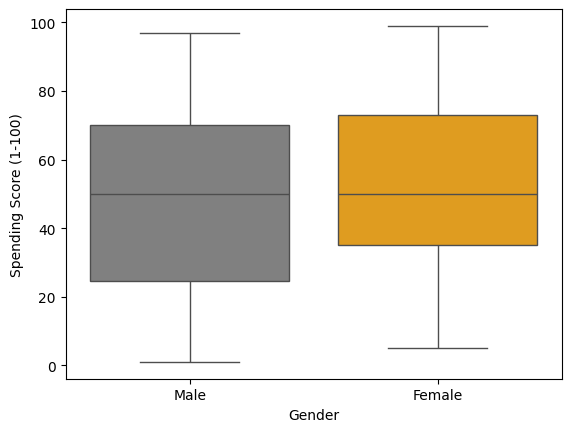

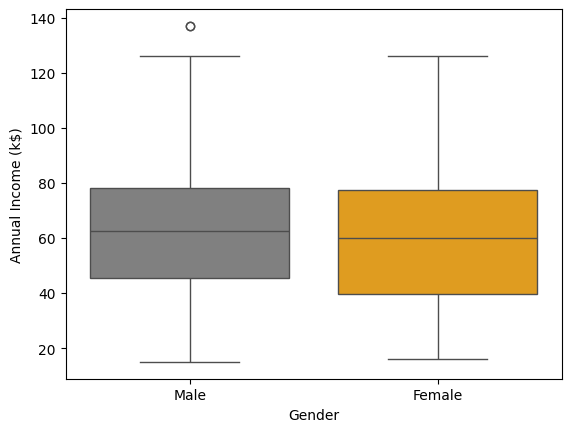

In [26]:
# visualise variables variations based on Gender
columns = ['Age','Spending Score (1-100)','Annual Income (k$)']
palette = {'Male': 'grey', 'Female': 'orange'}
for i in columns :
     plt.figure()
     sns.boxplot(data=data, x = 'Gender', y=data[i],palette=palette)

In [29]:
# the percentage 
data['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## **<font color='green'>Bivariate Analysis</font>**

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

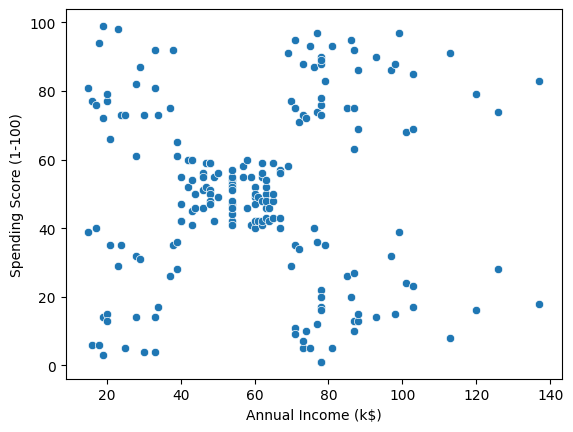

In [31]:
sns.scatterplot(data = data ,x = 'Annual Income (k$)',y = 'Spending Score (1-100)')

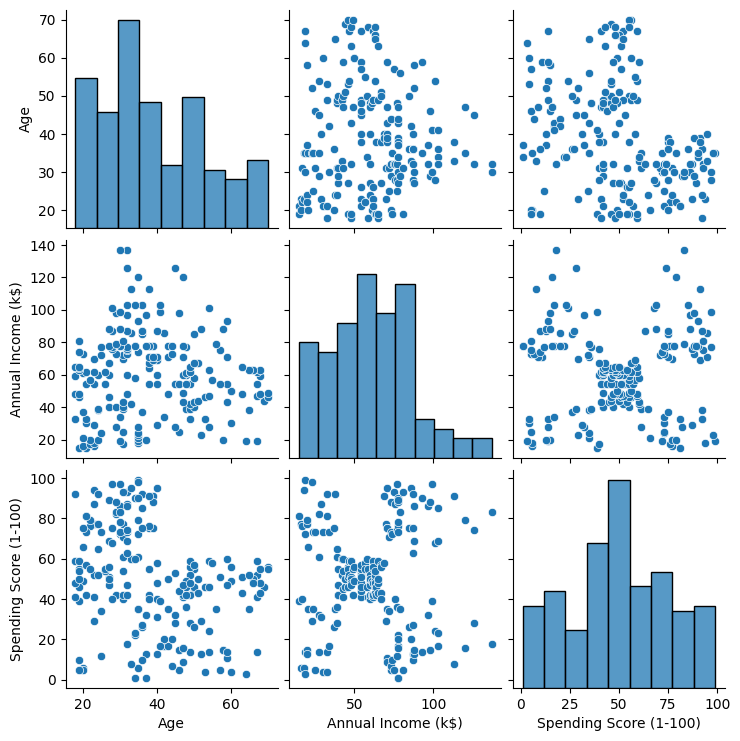

In [42]:
data = data.drop('CustomerID',axis=1)
sns.pairplot(data)

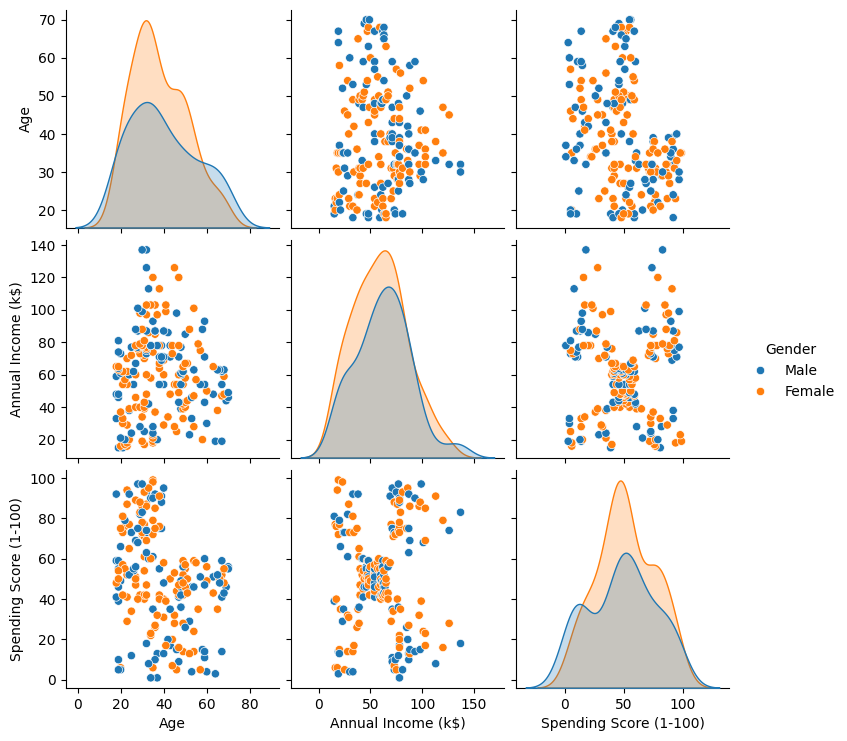

In [43]:
sns.pairplot(data,hue='Gender')

In [48]:
data.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [50]:
# corrolation
data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot: >

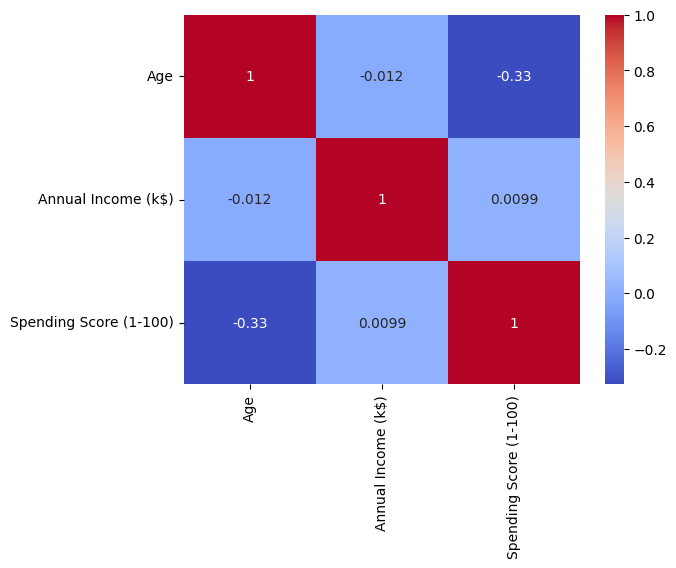

In [53]:
# heatmap
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

## **<font color='green'>Univariate Clustering</font>**

**Cluster Customers Depending on the Annnual Income**

#### **<font color='orange'>1- Initiate The Algorithm</font>**

#### **<font color='orange'>2- Fit the Data to The Algorithm</font>**

#### **<font color='orange'>3- Predict</font>**

In [92]:
clstr1 = KMeans(n_clusters=3) 

In [93]:
clstr1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [99]:
clstr1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [98]:
data['Income Cluster'] = clstr1.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [100]:
data['Income Cluster'].value_counts()

1    90
0    74
2    36
Name: Income Cluster, dtype: int64

In [101]:
# the dstance between the centroids
clstr1.inertia_

23517.330930930926

In [102]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
    

In [103]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3931.988095238096,
 2857.441697191697,
 2171.472222222222,
 1739.5591575091576]

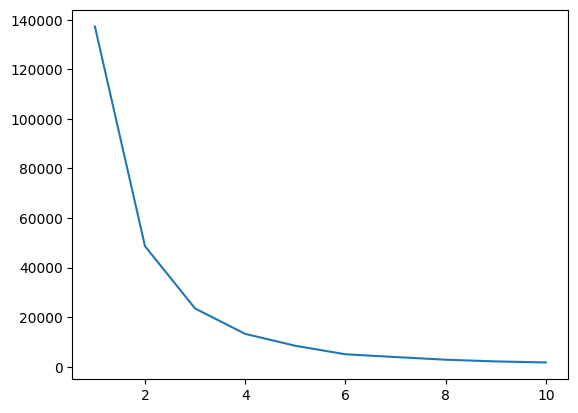

In [104]:
plt.plot(range(1,11),inertia_scores)

In [106]:
data.groupby('Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


## **<font color='green'>Bivariate Clustering</font>**

In [68]:
clstr2 = KMeans(n_clusters=5)
clstr2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
data['Spending + Income Cluster'] = clstr2.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending + Income Cluster,Age + Spending + Income Cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,4,4


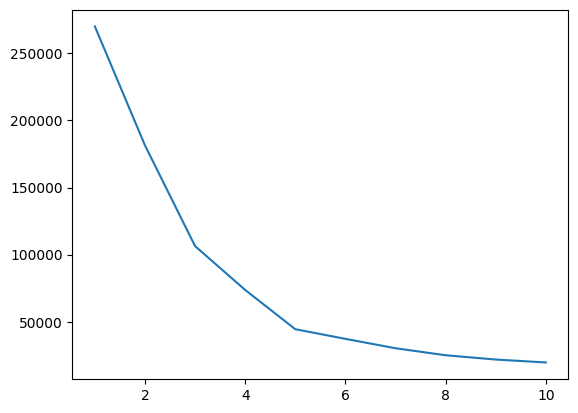

In [65]:
inertia_scores_2 = []
for i in range(1,11):
    kmeans_2 = KMeans(n_clusters = i)
    kmeans_2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores_2.append(kmeans_2.inertia_)
    
plt.plot(range(1,11),inertia_scores_2)    
    

In [66]:
# the centroids of the groups
centroids = pd.DataFrame(clstr2.cluster_centers_) 
centroids.columns = ['x','y']
centroids

,x,y
0,26.304348,20.913043
1,55.296296,49.518519
2,78.551724,82.172414
3,88.200000,17.114286
4,25.727273,79.363636
5,109.700000,82.000000


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

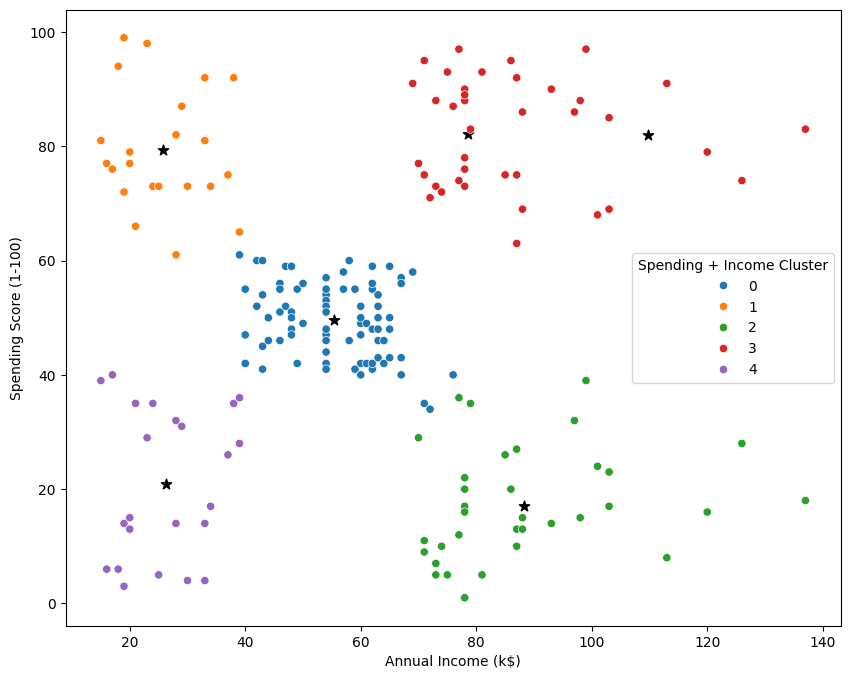

In [69]:
plt.figure(figsize=(10,8))
plt.scatter(x=centroids['x'],y=centroids['y'],c='black',s=60,marker='*')
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending + Income Cluster',palette='tab10')

In [19]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending + Income Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [24]:
# the propotion of genders in each cluster
pd.crosstab(data['Spending + Income Cluster'],data['Gender'],normalize ='index')

Gender,Female,Male
Spending + Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [25]:
# the mean values of proprities for each cluster
data.groupby('Spending + Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending + Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


**<u><h2 style='color:purple'>Analysis</h2></u>**

 - **The target customer group should be cluster 3 - it has a high income and a high spending score.**
 - **53% of the customers in cluster 3 are women. The company should focus its studies on this demographic to understand their preferences and choices better.**
 - **Cluster 1 offers a valuable opportunity to target customers for sales events featuring popular items.**

## **<font color='green'>Multivariate Clustering</font>**

In [41]:
data.to_csv('Clustered_Customers.csv')

In [42]:
clstr3 = KMeans(n_clusters=5)
clstr3.fit(data[['Annual Income (k$)','Spending Score (1-100)','Age']])
data['Age + Spending + Income Cluster'] = clstr3.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending + Income Cluster,Age + Spending + Income Cluster
0,1,Male,19,15,39,3,4
1,2,Male,21,15,81,4,3
2,3,Female,20,16,6,3,4
3,4,Female,23,16,77,4,3
4,5,Female,31,17,40,3,4


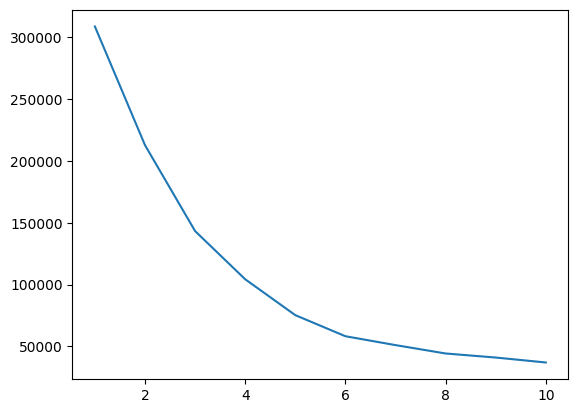

In [43]:
inertia_scores_3 = []
for i in range(1,11):
    kmeans_3 = KMeans(n_clusters = i)
    kmeans_3.fit(data[['Annual Income (k$)','Spending Score (1-100)','Age']])
    inertia_scores_3.append(kmeans_3.inertia_)
    
plt.plot(range(1,11),inertia_scores_3)    
    

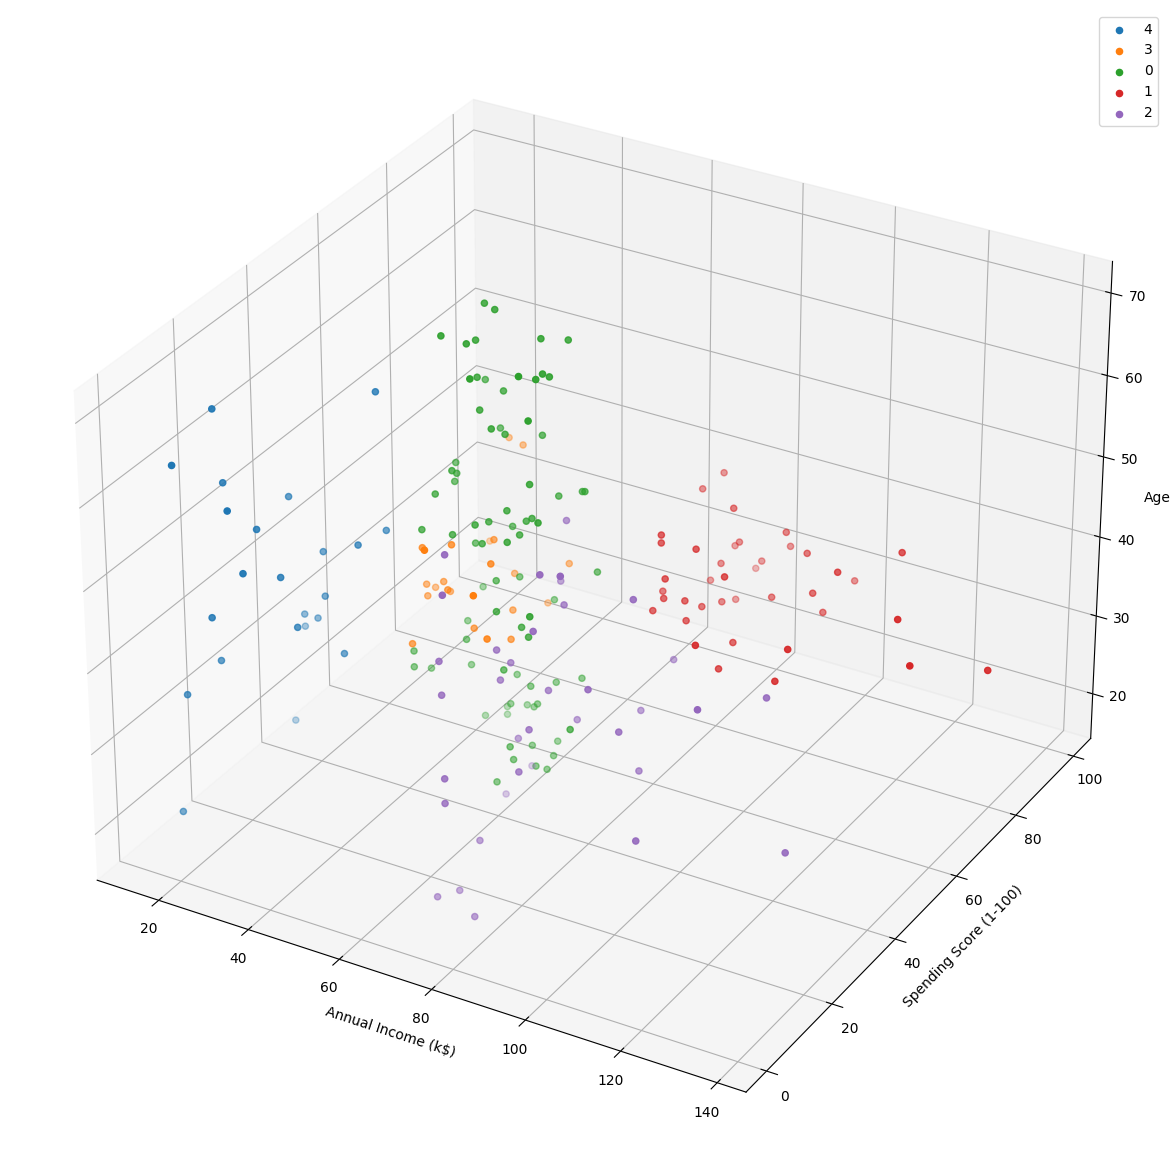

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

#'Age + Spending + Income Cluster' is the column representing the clusters
clusters = data['Age + Spending + Income Cluster'].unique()

# Define colors for the clusters
colors = sns.color_palette('tab10', len(clusters))

# Scatter plot for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = data[data['Age + Spending + Income Cluster'] == cluster]
    ax.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], cluster_data['Age'], color=colors[i], label=cluster)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.legend()
plt.show()
